In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/khas-mis-220-s-02-project/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/khas-mis-220-s-02-project/test.csv")


In [ ]:
train_df.head()

,Participant_ID,Age,Gender,Height_cm,Weight_kg,Diet_Type,Daily_Fruit_Consumption,Smoking_Status,Physical_Activity_Frequency,Hours_Sleep_Per_Night,Stress_Level,Overall_Health_Rating
0,PID_9840,63,Female,177.678968,62.921481,Omnivore,3,Non-smoker,6,6.309971,10,1
1,PID_9681,36,Female,183.623875,97.668547,Carnivore,2,NaN,3,5.474433,1,4
2,PID_7094,53,Male,160.102810,69.398061,Carnivore,2,Non-smoker,6,5.448860,9,4
3,PID_11294,51,Female,189.031692,47.546407,Omnivore,4,Non-smoker,3,8.576575,7,3
4,PID_821,51,Male,168.646146,77.767120,veg*n,4,Non-smoker,3,7.640731,2,5


In [ ]:
test_df.head()

,Participant_ID,Age,Gender,Height_cm,Weight_kg,Diet_Type,Daily_Fruit_Consumption,Smoking_Status,Physical_Activity_Frequency,Hours_Sleep_Per_Night,Stress_Level
0,PID_11500,56,Male,184.041411,61.219056,Omnivore,2,Non-smoker,2,6.010229,4
1,PID_6476,54,Other,159.324010,94.135500,Vegan,Two,Current smoker,4,6.564715,2
2,PID_13168,46,Female,181.036096,65.513816,Omnivore,3,Non-smoker,4,5.838753,8
3,PID_863,67,Male,187.306270,56.096536,Omnivore,5,Non-smoker,1,7.713050,6
4,PID_5971,53,Male,182.452861,76.761742,Carnivore,1,Former smoker,4,4.117980,5


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Participant_ID               12000 non-null  object 
 1   Age                          12000 non-null  int64  
 2   Gender                       11762 non-null  object 
 3   Height_cm                    12000 non-null  float64
 4   Weight_kg                    12000 non-null  float64
 5   Diet_Type                    12000 non-null  object 
 6   Daily_Fruit_Consumption      12000 non-null  object 
 7   Smoking_Status               11409 non-null  object 
 8   Physical_Activity_Frequency  12000 non-null  int64  
 9   Hours_Sleep_Per_Night        12000 non-null  float64
 10  Stress_Level                 12000 non-null  int64  
 11  Overall_Health_Rating        12000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.1+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Participant_ID               3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       2947 non-null   object 
 3   Height_cm                    3000 non-null   float64
 4   Weight_kg                    3000 non-null   float64
 5   Diet_Type                    3000 non-null   object 
 6   Daily_Fruit_Consumption      3000 non-null   object 
 7   Smoking_Status               2849 non-null   object 
 8   Physical_Activity_Frequency  3000 non-null   int64  
 9   Hours_Sleep_Per_Night        3000 non-null   float64
 10  Stress_Level                 3000 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 257.9+ KB


In [ ]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [ ]:
train_df['Smoking_Status'].fillna('Unknown', inplace=True)
test_df['Smoking_Status'].fillna('Unknown', inplace=True)

In [ ]:
# Diyet Türü Standartlaştırma
diet_mapping = {
    'Omnivore': 'Omnivore',
    'Omni': 'Omnivore',
    'Carnivore': 'Carnivore',
    'Vegan': 'Vegan',
    'Vegetarian': 'Vegetarian',
    'veg*n': 'Vegetarian'
}
train_df['Diet_Type'] = train_df['Diet_Type'].map(diet_mapping)
test_df['Diet_Type'] = test_df['Diet_Type'].map(diet_mapping)

# Cinsiyet Standartlaştırma
gender_mapping = {
    'Female': 'Female',
    'Male': 'Male',
    'Other': 'Other'
}
train_df['Gender'] = train_df['Gender'].map(gender_mapping)
test_df['Gender'] = test_df['Gender'].map(gender_mapping)


In [ ]:
text_to_number = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10
}

test_df['Daily_Fruit_Consumption'] = test_df['Daily_Fruit_Consumption'].str.lower()

test_df['Daily_Fruit_Consumption'] = test_df['Daily_Fruit_Consumption'].replace(text_to_number)

In [ ]:
test_df['Daily_Fruit_Consumption'].unique()


array(['2', 2, '3', '5', '1', '4', 1], dtype=object)

In [ ]:
numeric_columns = ['Age', 'Height_cm', 'Weight_kg', 'Daily_Fruit_Consumption',
                   'Physical_Activity_Frequency', 'Hours_Sleep_Per_Night', 'Stress_Level']

# Geçersiz değerleri tespit etme
for column in numeric_columns:
    non_numeric_values = train_df[~train_df[column].apply(lambda x: isinstance(x, (int, float)))][column].unique()
    if len(non_numeric_values) > 0:
        print(f"Geçersiz değerler {column} sütununda bulundu: {non_numeric_values}")

    non_numeric_values_test = test_df[~test_df[column].apply(lambda x: isinstance(x, (int, float)))][column].unique()
    if len(non_numeric_values_test) > 0:
        print(f"Geçersiz değerler {column} sütununda test veri setinde bulundu: {non_numeric_values_test}")


Geçersiz değerler Daily_Fruit_Consumption sütununda bulundu: ['3' '2' '4' '1' '5' 'Two' 'One']
Geçersiz değerler Daily_Fruit_Consumption sütununda test veri setinde bulundu: ['2' '3' '5' '1' '4']


In [ ]:
# Geçersiz değerleri NaN ile değiştirme
for column in numeric_columns:
    train_df[column] = pd.to_numeric(train_df[column], errors='coerce')
    test_df[column] = pd.to_numeric(test_df[column], errors='coerce')

# Eksik değerleri doldurma (örneğin, ortalama ile)
for column in numeric_columns:
    train_df[column].fillna(train_df[column].mean(), inplace=True)
    test_df[column].fillna(test_df[column].mean(), inplace=True)


In [ ]:
# Geçersiz değerleri NaN ile değiştirme
for column in numeric_columns:
    train_df[column] = pd.to_numeric(train_df[column], errors='coerce')
    test_df[column] = pd.to_numeric(test_df[column], errors='coerce')

# Eksik değerleri doldurma (örneğin, ortalama ile)
for column in numeric_columns:
    train_df[column].fillna(train_df[column].mean(), inplace=True)
    test_df[column].fillna(test_df[column].mean(), inplace=True)


In [ ]:
numeric_columns = ['Age', 'Height_cm', 'Weight_kg', 'Daily_Fruit_Consumption',
                   'Physical_Activity_Frequency', 'Hours_Sleep_Per_Night', 'Stress_Level']

for column in numeric_columns:
    train_df[column].fillna(train_df[column].mean(), inplace=True)
    test_df[column].fillna(test_df[column].mean(), inplace=True)


In [ ]:
categorical_columns = ['Gender', 'Diet_Type']

for column in categorical_columns:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)


In [ ]:
# Eksik Değerleri Doldurma
train_df['Smoking_Status'].fillna('Unknown', inplace=True)
test_df['Smoking_Status'].fillna('Unknown', inplace=True)

# Sayısal sütunlar için ortalama ile doldurma
numeric_columns = ['Age', 'Height_cm', 'Weight_kg', 'Daily_Fruit_Consumption',
                   'Physical_Activity_Frequency', 'Hours_Sleep_Per_Night', 'Stress_Level']

for column in numeric_columns:
    train_df[column].fillna(train_df[column].mean(), inplace=True)
    test_df[column].fillna(test_df[column].mean(), inplace=True)

# Kategorik sütunlar için mod (en sık tekrar eden değer) ile doldurma
categorical_columns = ['Gender', 'Diet_Type']

for column in categorical_columns:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)


In [ ]:
# Mantıksız değerleri kontrol etme
print(train_df[(train_df['Weight_kg'] <= 0) | (train_df['Height_cm'] <= 0)])


Empty DataFrame
Columns: [Participant_ID, Age, Gender, Height_cm, Weight_kg, Diet_Type, Daily_Fruit_Consumption, Smoking_Status, Physical_Activity_Frequency, Hours_Sleep_Per_Night, Stress_Level, Overall_Health_Rating]
Index: []


In [ ]:
# Hedef değişkenin sınıf dağılımını kontrol etme
class_distribution = train_df['Overall_Health_Rating'].value_counts()
print("Hedef değişkenin sınıf dağılımı:\n", class_distribution)


Hedef değişkenin sınıf dağılımı:
 Overall_Health_Rating
2    2462
5    2449
4    2410
3    2362
1    2317
Name: count, dtype: int64


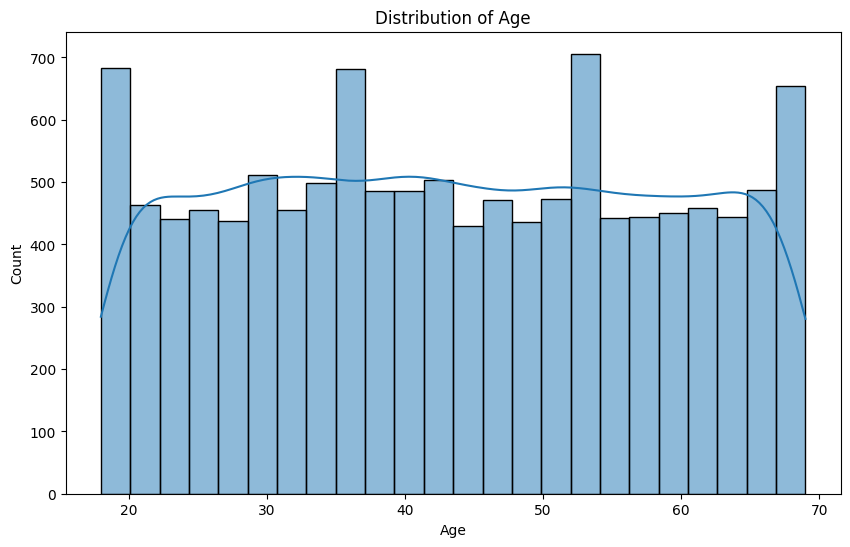

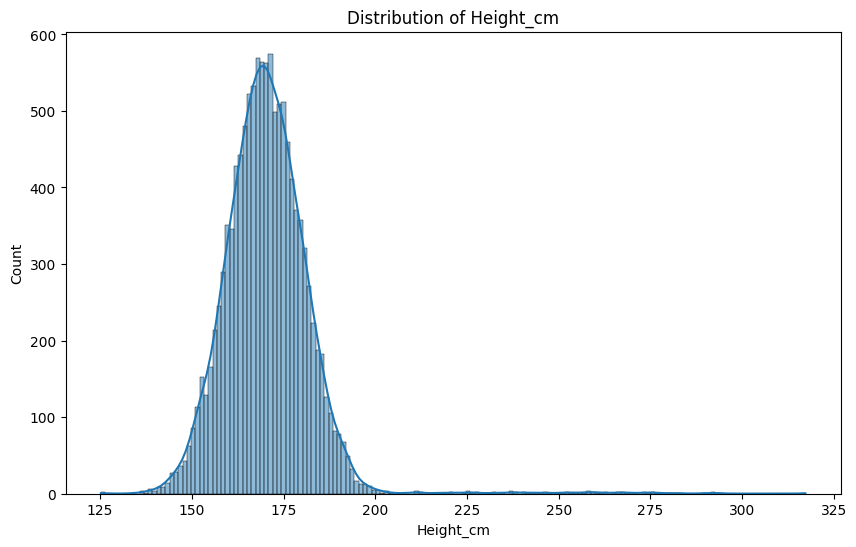

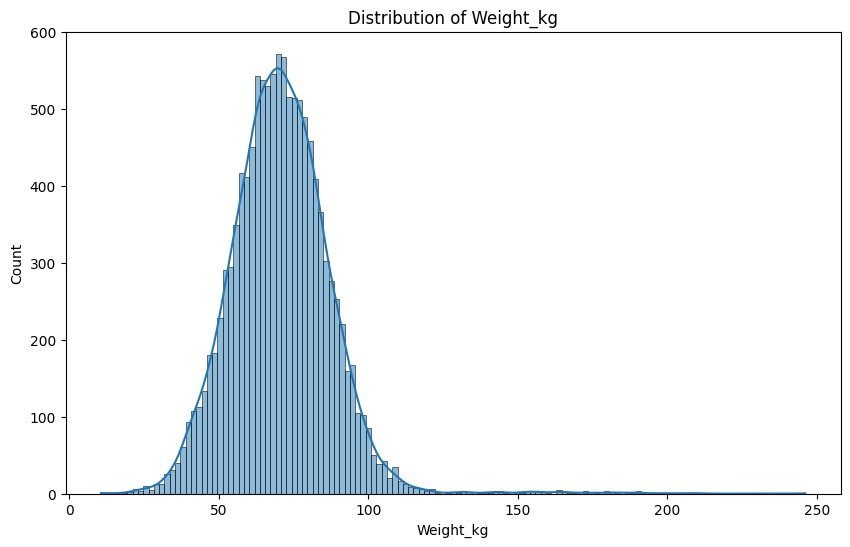

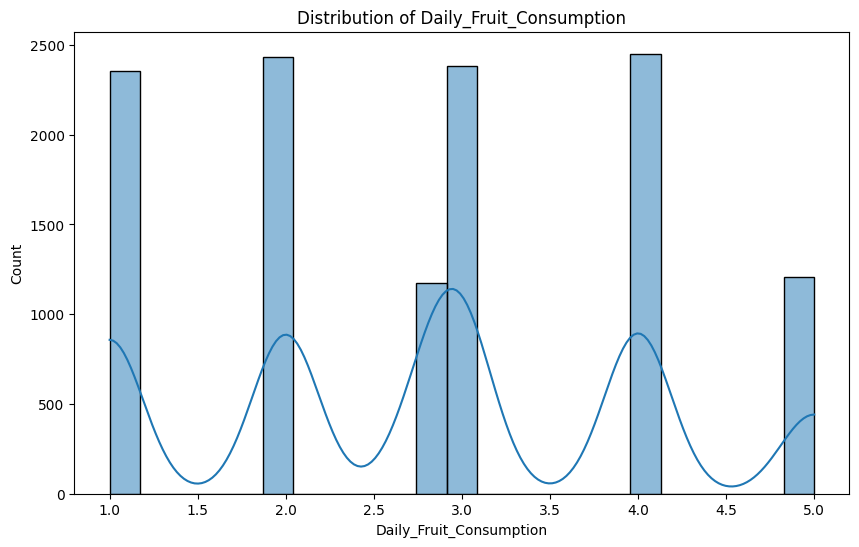

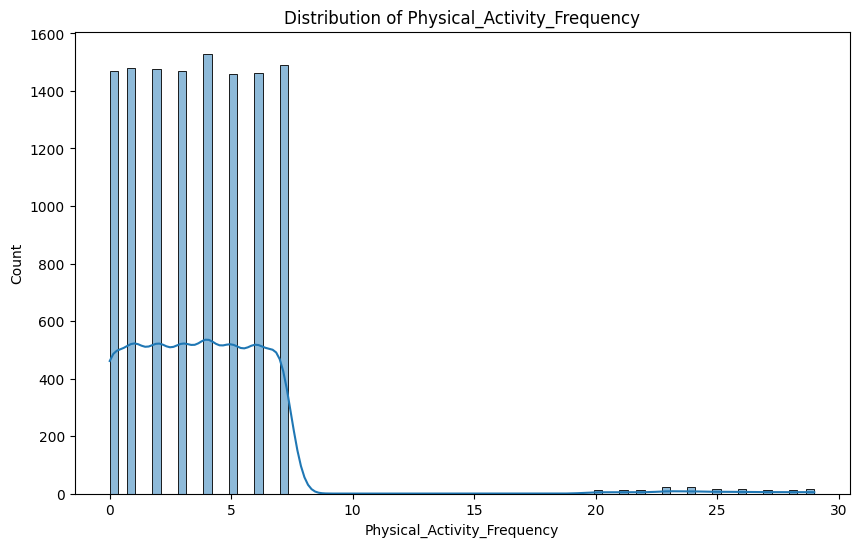

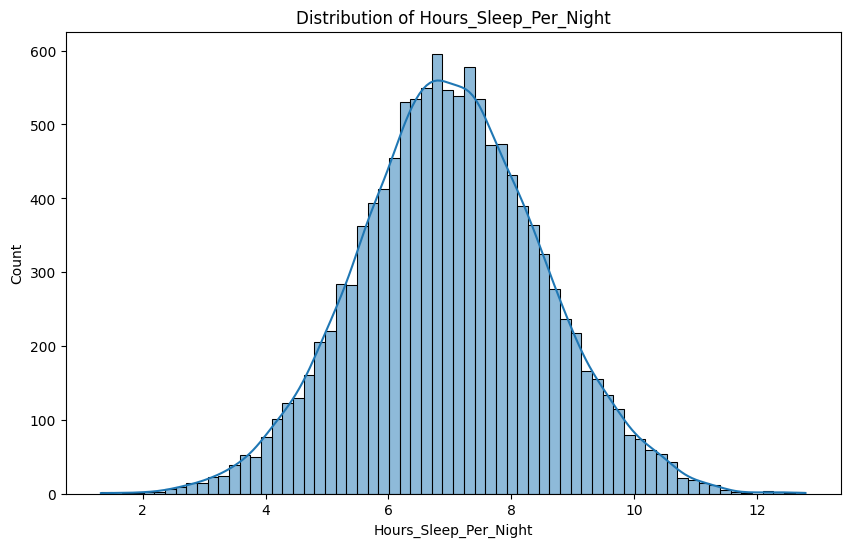

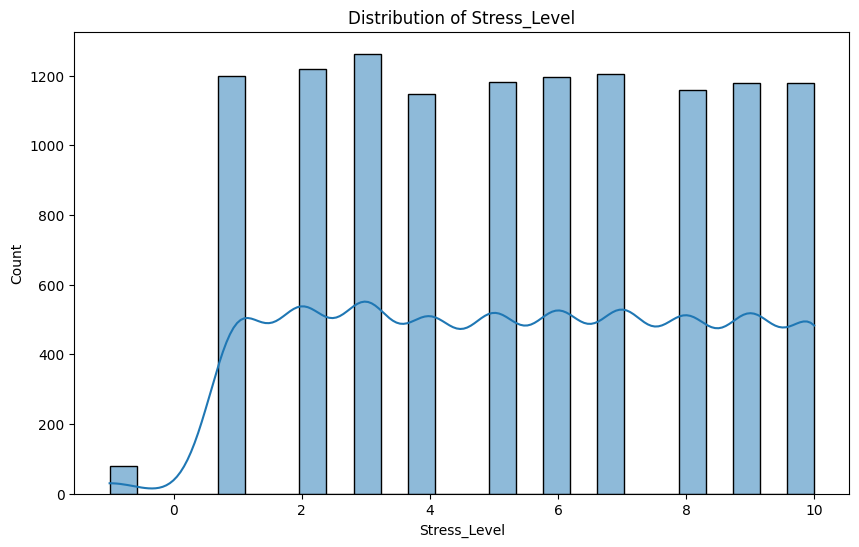

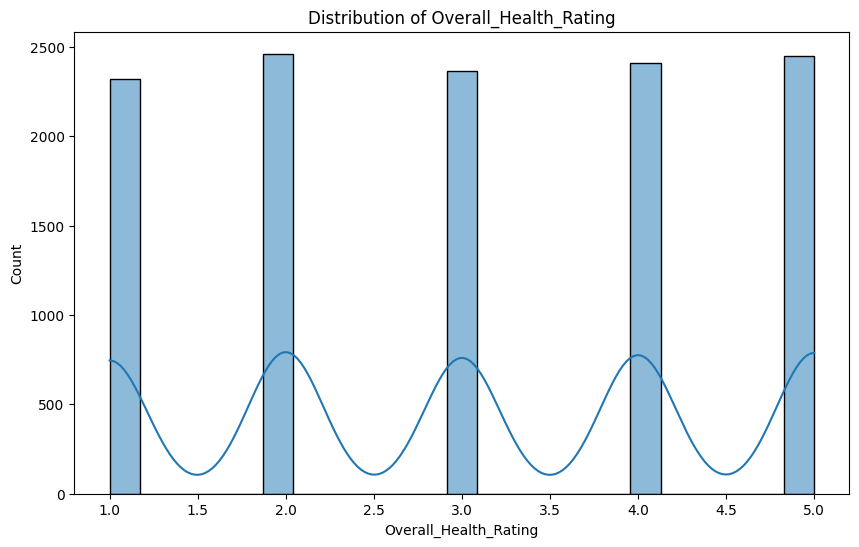

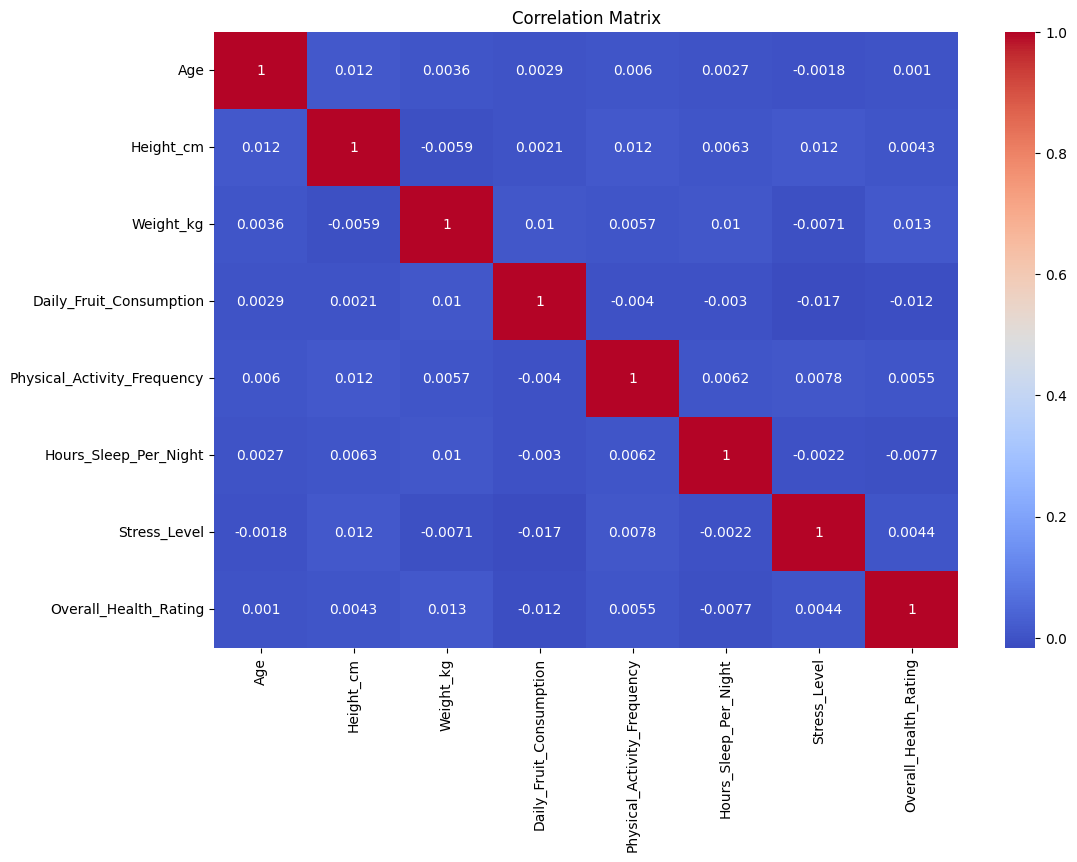

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (excluding non-numeric columns like 'Participant_ID')
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Plot the distribution of numeric features
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Check the correlation matrix
correlation_matrix = train_df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=5000),
  #  'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

# Parameter grids for hyperparameter optimization
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10, 15]
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100, 200],
        'solver': ['lbfgs', 'liblinear']
    },
   # 'SVM': {
    #    'C': [0.1, 1, 10, 100],
     #   'kernel': ['linear', 'rbf', 'poly']
   # },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.05, 0.1, 0.2]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Load the training dataset
train_df = pd.read_csv('/content/drive/MyDrive/MIS220ProjectData/khas-mis220-s01-project_datasets/train.csv')

# Data preparation
X = train_df.drop(columns=['Participant_ID', 'Overall_Health_Rating'])  # Features
y = train_df['Overall_Health_Rating']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)

# Align columns in validation set to match training set
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Dictionary to store F1 scores
f1_scores = {}

# Train each model with GridSearchCV and calculate the F1 score
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')
    f1_scores[model_name] = f1
    print(f"{model_name} F1 Score: {f1}")

# Find the best performing model
best_model_name = max(f1_scores, key=f1_scores.get)
best_model_f1 = f1_scores[best_model_name]

print(f"\nBest Model: {best_model_name}, F1 Score: {best_model_f1}")

# Load the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/khas-mis-220-s-02-project/test.csv')

# Making predictions on the test set with the best model
test_X = test_df.drop(columns=['Participant_ID'])  # Features
test_X = pd.get_dummies(test_X, drop_first=True)
#test_X = test_X.reindex(columns=X_train.columns, fill_value=0)  # Align columns to match training set
test_X = scaler.transform(test_X)  # Standardize the test set

# Predict using the best model
best_model = models[best_model_name]
best_model.fit(X_train, y_train)  # Fit the best model on the entire training set
test_predictions = best_model.predict(test_X)

# Load the existing CSV file
existing_df = pd.read_csv('/content/drive/MyDrive/khas-mis-220-s-02-project/sample_solution.csv')

# Update the Overall_Health_Rating column with new predictions
existing_df['Overall_Health_Rating'] = test_predictions

# Save the updated predictions to the CSV file
existing_df.to_csv("/content/drive/MyDrive/khas-mis-220-s-02-project/sample_solution.csv", index=False)

print("Predictions have been updated and saved to '/content/drive/MyDrive/khas-mis-220-s-02-project/sample_solution.csv'")


RandomForest F1 Score: 0.19658643760738678
LogisticRegression F1 Score: 0.19695368145059128
KNN F1 Score: 0.20393218533620014
AdaBoost F1 Score: 0.19274894859159805
GradientBoosting F1 Score: 0.19451609392204242

Best Model: KNN, F1 Score: 0.20393218533620014
Predictions have been updated and saved to '/content/drive/MyDrive/khas-mis-220-s-02-project/sample_solution.csv'


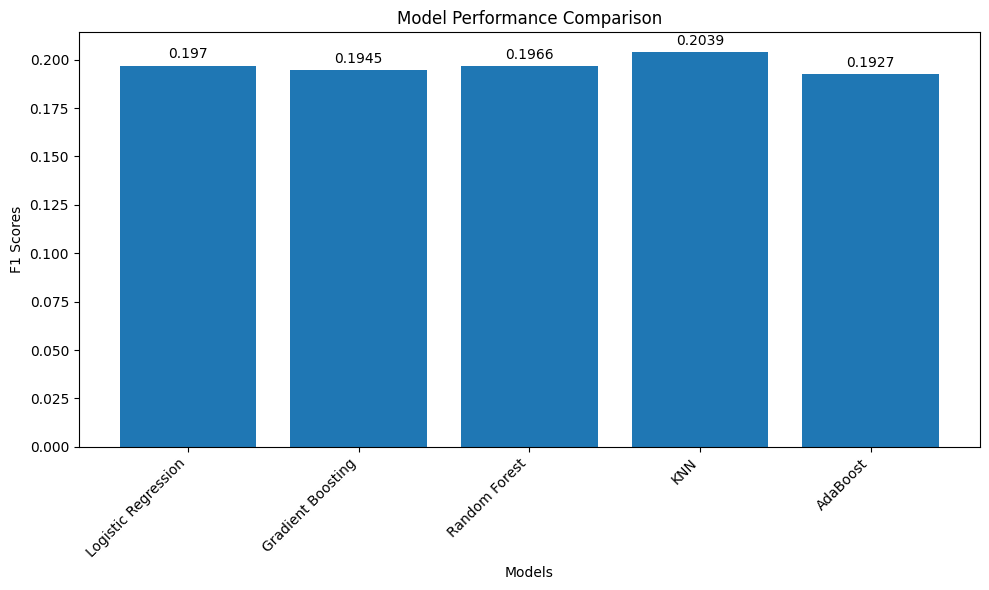

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Gradient Boosting', 'Random Forest', 'KNN', 'AdaBoost']
f1_scores = [0.19695368145059128, 0.19451609392204242, 0.19658643760738678, 0.20393218533620014, 0.19274894859159805]
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x, f1_scores)

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
#ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()
plt.show()


In [ ]:
existing_df.head(30



)

,Participant_ID,Overall_Health_Rating
0,PID_11500,4
1,PID_6476,5
2,PID_13168,4
3,PID_863,5
4,PID_5971,4
5,PID_6707,5
6,PID_3018,1
7,PID_3782,2
8,PID_3899,3
9,PID_2251,1
